<a href="https://colab.research.google.com/github/imYours14/PCVK_Genap_2023/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Praktikum

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


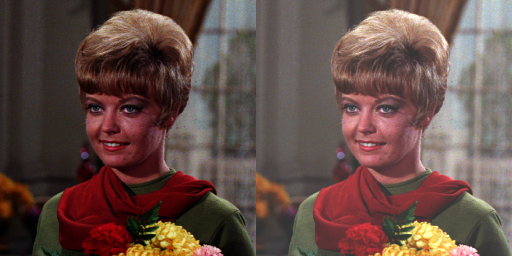

In [4]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Week3/female.tiff') # get image from gdrive
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)
     

Tugas

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


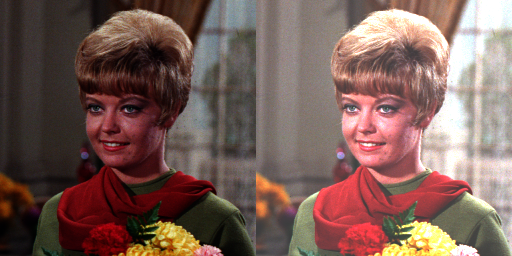

In [7]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try :
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Week3/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukan nilai kecerahan: 30


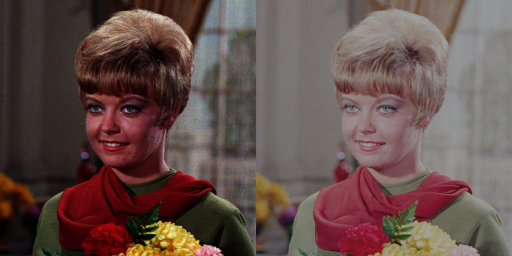

In [8]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  input('Error, not a number')

brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

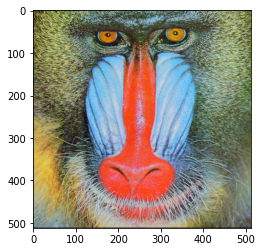

In [9]:
img = cv.imread("/content/drive/MyDrive/PCVK/Week3/mandrill.tiff")
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

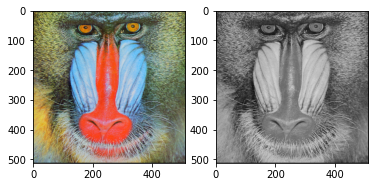

In [10]:
img_avg = img
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

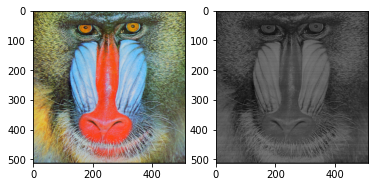

In [11]:
img_lightness = img
img_lightness[:] = np.max(img_lightness,axis=-1, keepdims=100)/2 + np.min(img_lightness,axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_lightness)

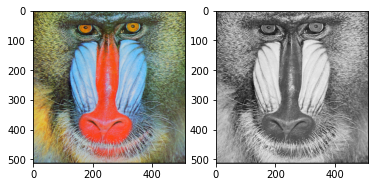

In [19]:
img_luminance = img
R, G, B = img_luminance[:,:,0], img_luminance[:,:,1], img_luminance[:,:,2]
gray_img_luminance = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_luminance, cmap='gray')

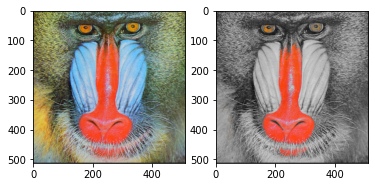

In [23]:
img = cv.imread('/content/drive/MyDrive/PCVK/Week3/mandrill.tiff')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

temp = np.array(img)
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        if (temp[y,x,0] < 200 or temp[y,x,1] > 140):
            temp[y,x]= np.mean(temp[y,x])

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(temp)